In [2]:
# 04_hierarchical_demo.ipynb (Python Code exportiert als Skript zur Vorlage)

import matplotlib.pyplot as plt
from shapely.geometry import LineString
from planners.hierarchical_planner import HierarchicalPlanner  # korrekt benannt als HierarchicalPlanner bei dir?
from planners.lazy_prm import LazyPRM
from planners.basic_prm import BasicPRM
from planners.visibility_prm import VisibilityPRM
from utils.collision_checker import CollisionChecker
from utils.hierarchical_visualize import visualize_hierarchical_planning
from environment import get_all_scenes

scenes = get_all_scenes()
# Suche nach der U-Shape Szene in der Liste
scene_data = next((data for name, data in scenes if name == "Corridor"), None)
if scene_data:
    scene, limits, (start, goal) = scene_data
else:
    raise ValueError("Shape Szene nicht gefunden")


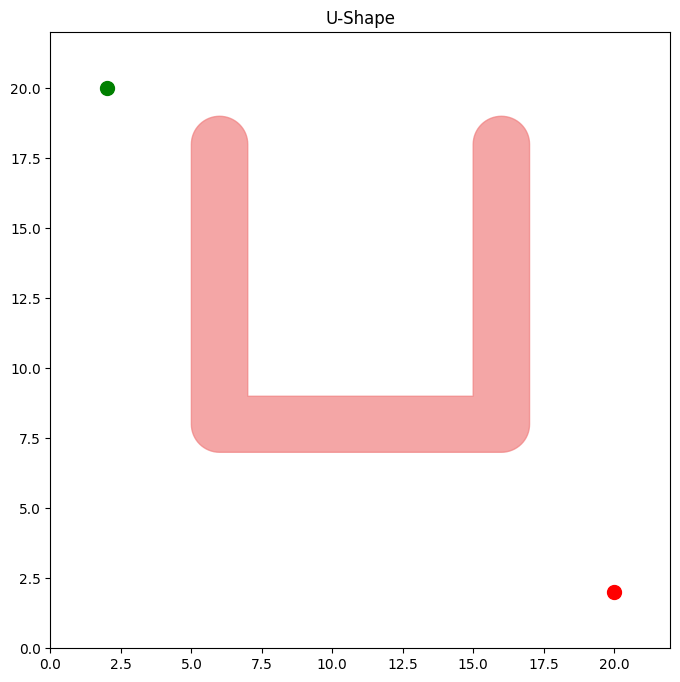

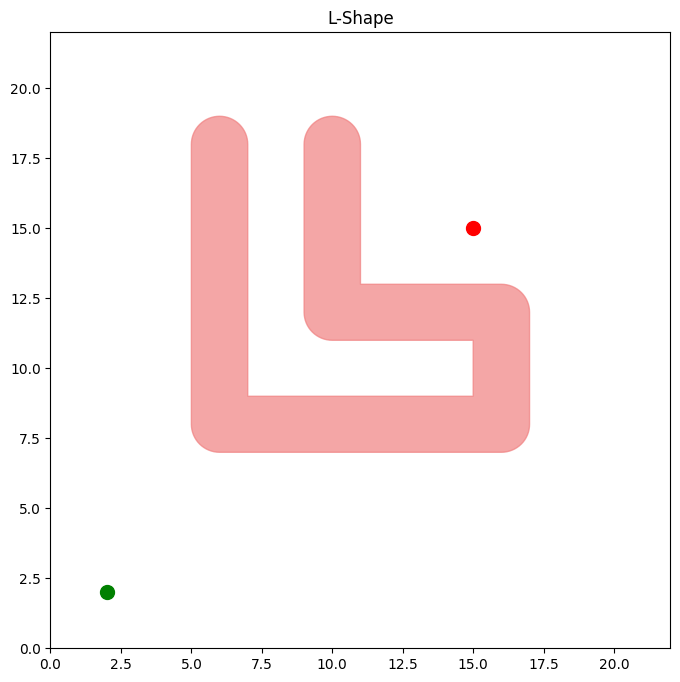

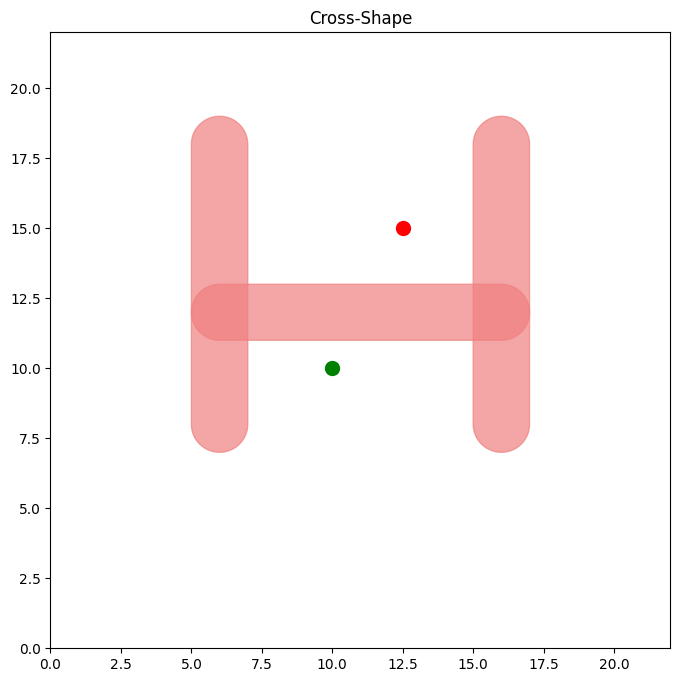

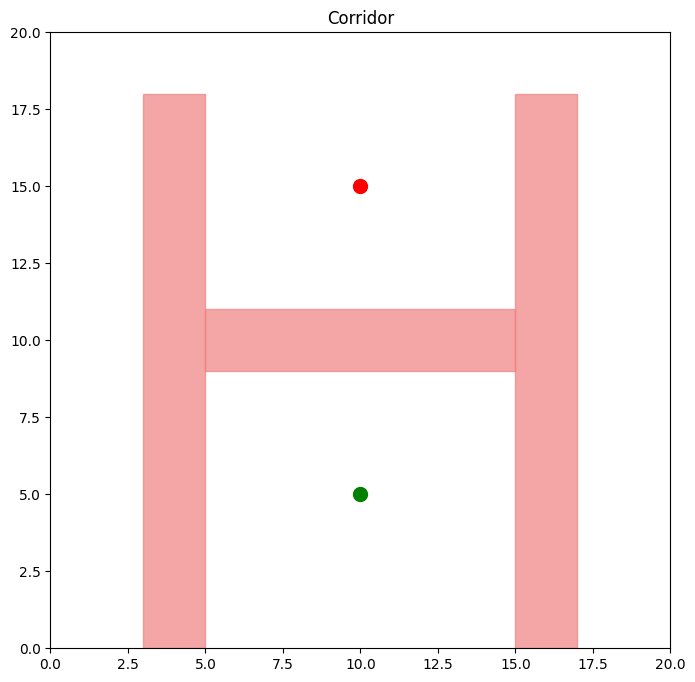

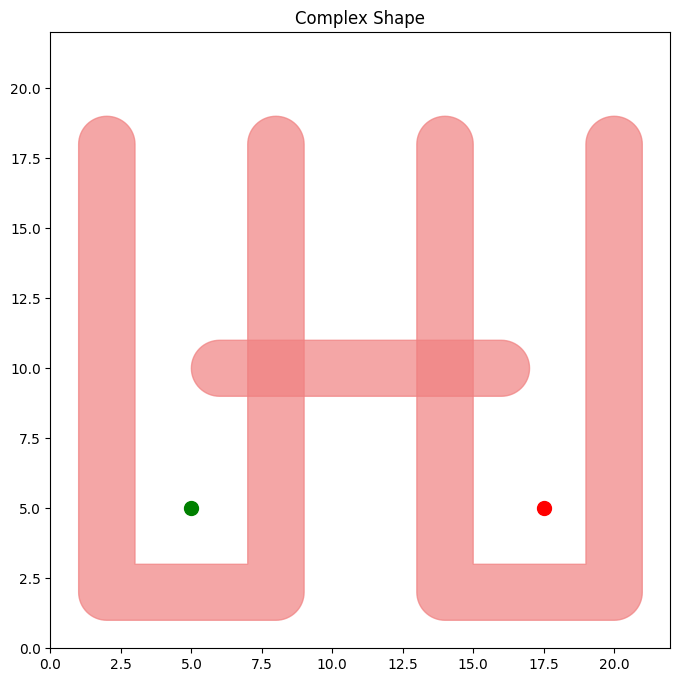

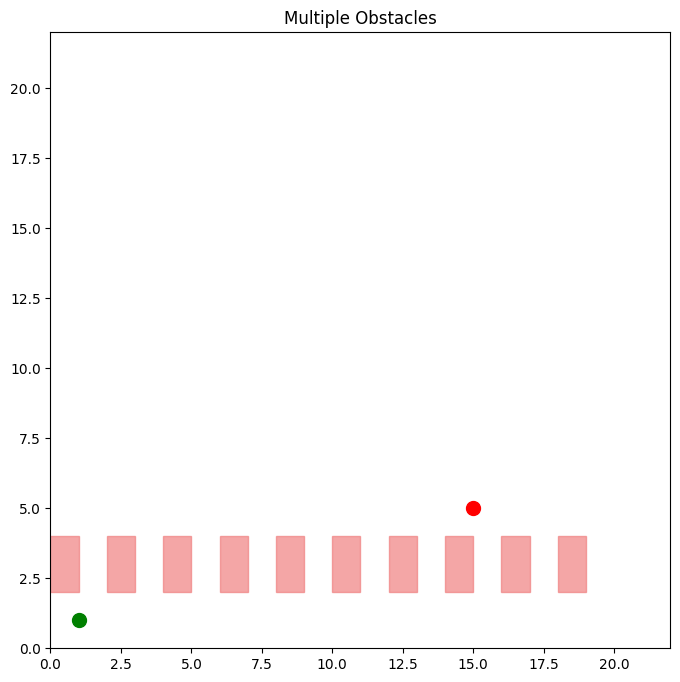

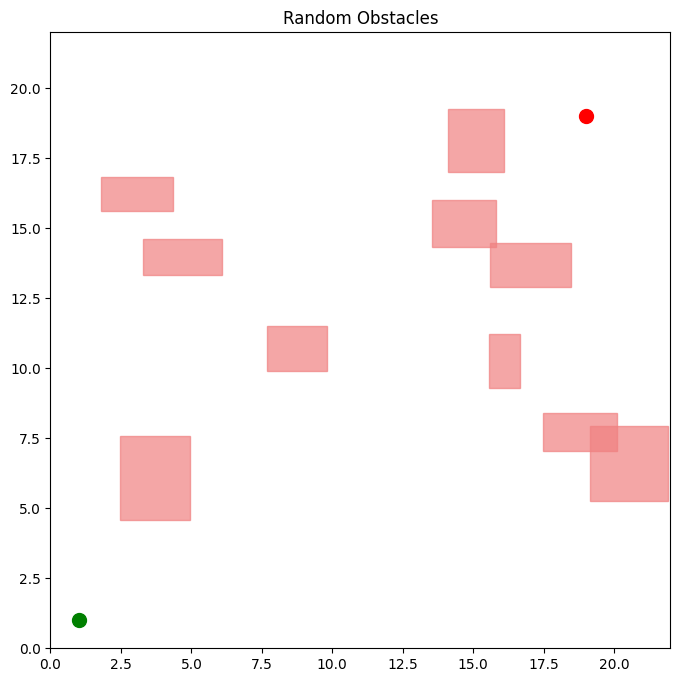

In [3]:
# Plotte alle Szenen zur Überprüfung
for name, (scene, limits, (start, goal)) in scenes:
    fig, ax = plt.subplots(figsize=(8, 8))
    for shape in scene.values():
        xs, ys = shape.exterior.xy if hasattr(shape, 'exterior') else shape.xy
        ax.fill(xs, ys, color='lightcoral', alpha=0.7)
    # Zeichne Start- und Zielpunkte
    ax.plot(start[0], start[1], 'go', markersize=10)
    ax.plot(goal[0], goal[1], 'ro', markersize=10)
    ax.set_title(name)
    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    plt.show()

In [4]:
# --- Konfiguration für den globalen Planer (VisibilityPRM) ---
config_high = {
    "ntry": 100,  # Anzahl der Versuche für die Roadmap
    "kNearest": 10,  # Anzahl der nächsten Nachbarn
    "maxIterations": 20  # Maximale Iterationen für den globalen Planer
}

config_low = {
    "initialRoadmapSize": 100,
    "updateRoadmapSize": 20,
    "kNearest": 8,
    "maxIterations": 10
}

config_low_basic = {
    "numNodes": 100,
    "radius": 3.0
}


In [5]:
# check all scenes and safe them in a list
scenes = get_all_scenes()
# check all scenes for collision checking
for name, (scene, limits, (start, goal)) in scenes:
    print(f"Scene: {name}, Limits: {limits}, Start: {start}, Goal: {goal}")


Scene: U-Shape, Limits: ((0, 22), (0, 22)), Start: (2.0, 20.0), Goal: (20.0, 2.0)
Scene: L-Shape, Limits: ((0, 22), (0, 22)), Start: (2.0, 2.0), Goal: (15.0, 15.0)
Scene: Cross-Shape, Limits: ((0, 22), (0, 22)), Start: (10, 10.0), Goal: (12.5, 15.0)
Scene: Corridor, Limits: ((0, 20), (0, 20)), Start: (10.0, 5.0), Goal: (10.0, 15.0)
Scene: Complex Shape, Limits: ((0, 22), (0, 22)), Start: (5.0, 5.0), Goal: (17.5, 5.0)
Scene: Multiple Obstacles, Limits: ((0, 22), (0, 22)), Start: (1.0, 1.0), Goal: (15.0, 5.0)
Scene: Random Obstacles, Limits: ((0, 22), (0, 22)), Start: (1.0, 1.0), Goal: (19.0, 19.0)


In [6]:
# --- Planer aufsetzen ---
scene_data = next((data for name, data in scenes if name == "Complex Shape"), None)
if scene_data:
    scene, limits, (start, goal) = scene_data
else:
    raise ValueError("Shape Szene nicht gefunden")
collision_checker = CollisionChecker(scene, limits)
start = [[5, 5]]
goal = [[17.5, 5]]
hier_planner = HierarchicalPlanner(
    scene=scene,
    limits=limits,
    GlobalPlannerClass=VisibilityPRM,
    LocalPlannerClass=LazyPRM,
    config_global=config_high,
    config_local=config_low
)


Globaler Pfad: ['start', 131, 10, 36, 7, 28, 1, 129, 'goal']
Koordinaten des globalen Pfads: [[5, 5], array([4.09028156, 5.33979035]), array([ 6.08918047, 18.18088536]), array([ 9.61885346, 19.9227778 ]), array([10.48878785, 16.64657873]), array([15.58056383, 21.75127387]), array([17.89770815, 13.29279145]), array([16.90758231,  3.94318936]), [17.5, 5]]
Segment 0: [5, 5] → [4.09028156 5.33979035]
→ Lokaler Planner für Segment 0: [5, 5] → [4.09028156 5.33979035]
   Lokale Begrenzung (geclipped): ((np.float64(3.574035672263487), np.float64(5.516245885386042)), (np.float64(4.198790069677501), np.float64(6.141000282800056)))
Segment 1: [4.09028156 5.33979035] → [ 6.08918047 18.18088536]
→ Lokaler Planner für Segment 1: [4.09028156 5.33979035] → [ 6.08918047 18.18088536]
   Lokale Begrenzung (geclipped): ((0, np.float64(13.089731013749503)), (np.float64(3.7603378574466664), np.float64(19.760337857446665)))
Segment 2: [ 6.08918047 18.18088536] → [ 9.61885346 19.9227778 ]
→ Lokaler Planner fü

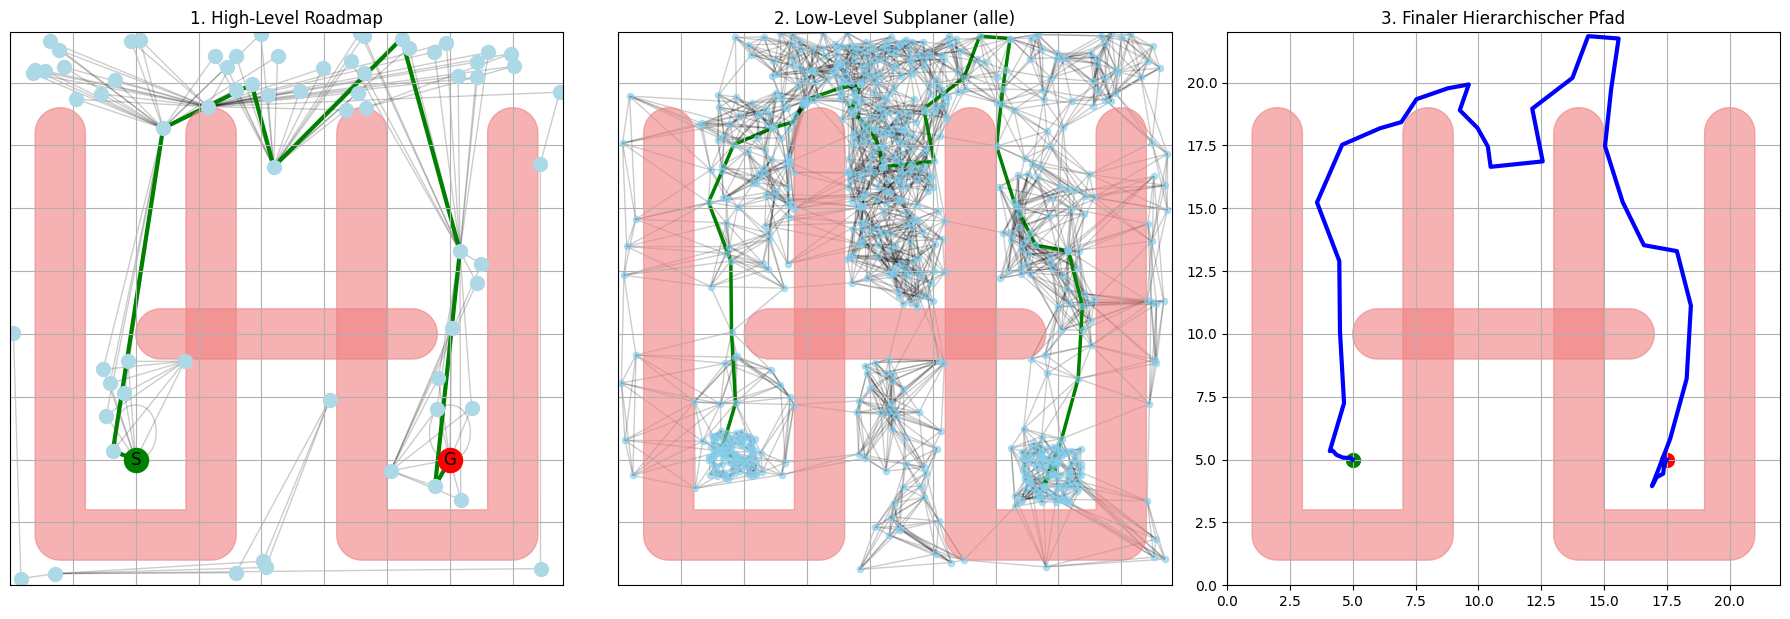

In [7]:
# --- Pfadplanung ---
path = hier_planner.plan_path(start, goal)
if not path:
    print("❌ Kein Pfad gefunden.")
else:
    print("✅ Pfad gefunden mit", len(path), "Punkten")

    # Korrekte Reihenfolge der Initialisierung für die Visualisierung
    hier_planner.solution_path = path  # Statt final_path
    hier_planner.graph = hier_planner.global_planner.graph  # Verwende direkt den globalen Planer-Graph

    collision_checker = CollisionChecker(hier_planner.scene, hier_planner.limits)
    visualize_hierarchical_planning(hier_planner, collision_checker, hier_planner.config_local)



🔄 Verarbeite Szene: U-Shape
Globaler Pfad: ['start', 102, 32, 38, 3, 77, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([ 2.47442793, 19.70879128]), array([ 4.6074306 , 10.58374939]), array([3.56534415, 2.32945707]), array([13.6781181 ,  2.81273807]), array([19.75470532,  2.79128442]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [ 2.47442793 19.70879128]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [ 2.47442793 19.70879128]
   Lokale Begrenzung (geclipped): ((np.float64(1.680541367716493), np.float64(2.793886559301138)), (np.float64(19.29772304217488), np.float64(20.411068233759522)))
Segment 1: [ 2.47442793 19.70879128] → [ 4.6074306  10.58374939]
→ Lokaler Planner für Segment 1: [ 2.47442793 19.70879128] → [ 4.6074306  10.58374939]
   Lokale Begrenzung (geclipped): ((0, np.float64(11.54092926122252)), (np.float64(7.146270334470039), 22))
Segment 2: [ 4.6074306  10.58374939] → [3.56534415 2.32945707]
→ Lokaler Planner für Segment 2: [ 4.6074306  10.58374939] → [3.56534415 2.

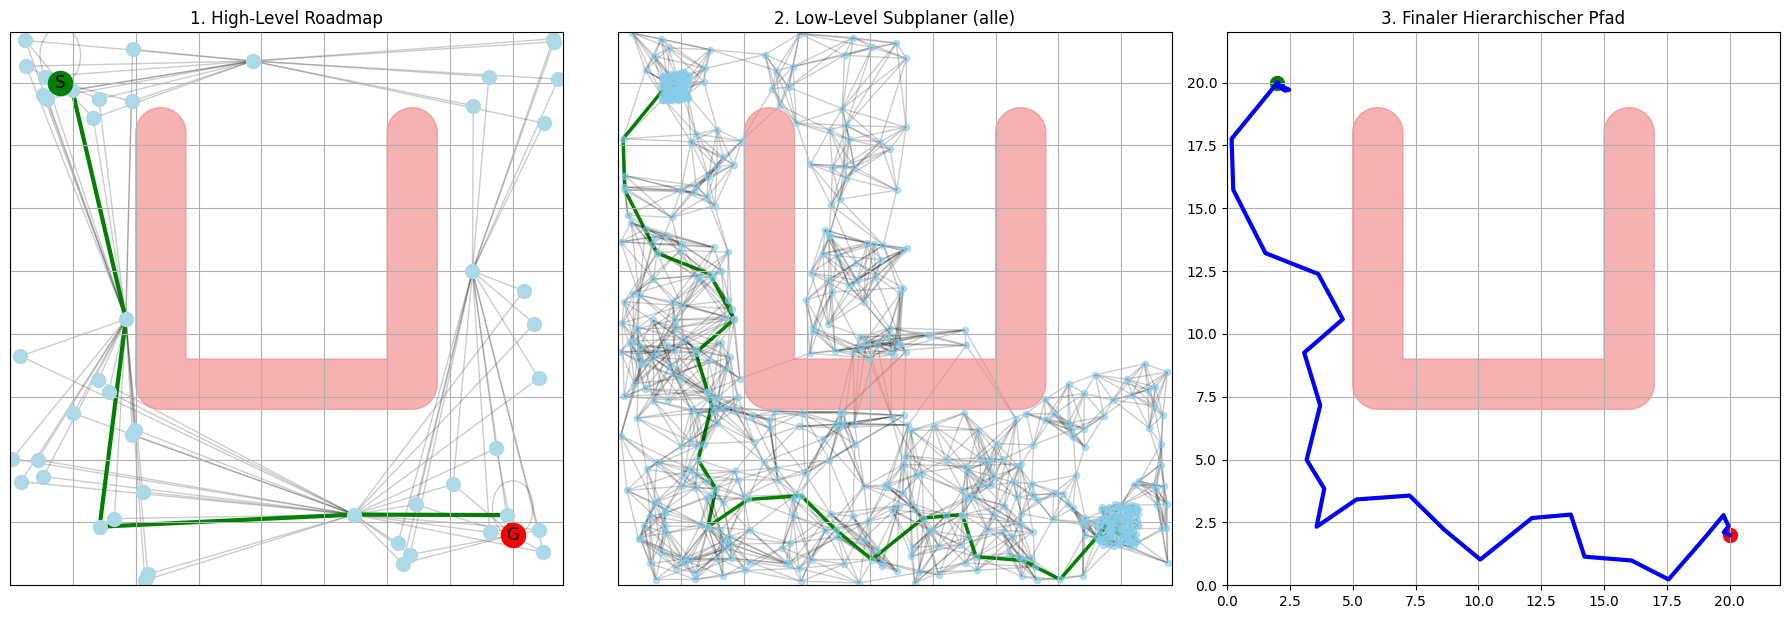


🔄 Verarbeite Szene: L-Shape
Globaler Pfad: ['start', 75, 1, 37, 'goal']
Koordinaten des globalen Pfads: [[2.0, 2.0], array([2.35513869, 0.19247771]), array([17.16238002,  7.45697829]), array([16.89641797, 15.86742565]), [15.0, 15.0]]
Segment 0: [2.0, 2.0] → [2.35513869 0.19247771]
→ Lokaler Planner für Segment 0: [2.0, 2.0] → [2.35513869 0.19247771]
   Lokale Begrenzung (geclipped): ((np.float64(0.3354889108092225), np.float64(4.019649774517804)), (0, np.float64(2.9383192864728516)))
Segment 1: [2.35513869 0.19247771] → [17.16238002  7.45697829]
→ Lokaler Planner für Segment 1: [2.35513869 0.19247771] → [17.16238002  7.45697829]
   Lokale Begrenzung (geclipped): ((np.float64(1.7587593507515678), np.float64(17.758759350751568)), (0, np.float64(11.82472799740288)))
Segment 2: [17.16238002  7.45697829] → [16.89641797 15.86742565]
→ Lokaler Planner für Segment 2: [17.16238002  7.45697829] → [16.89641797 15.86742565]
   Lokale Begrenzung (geclipped): ((np.float64(9.029398995051913), 22), (

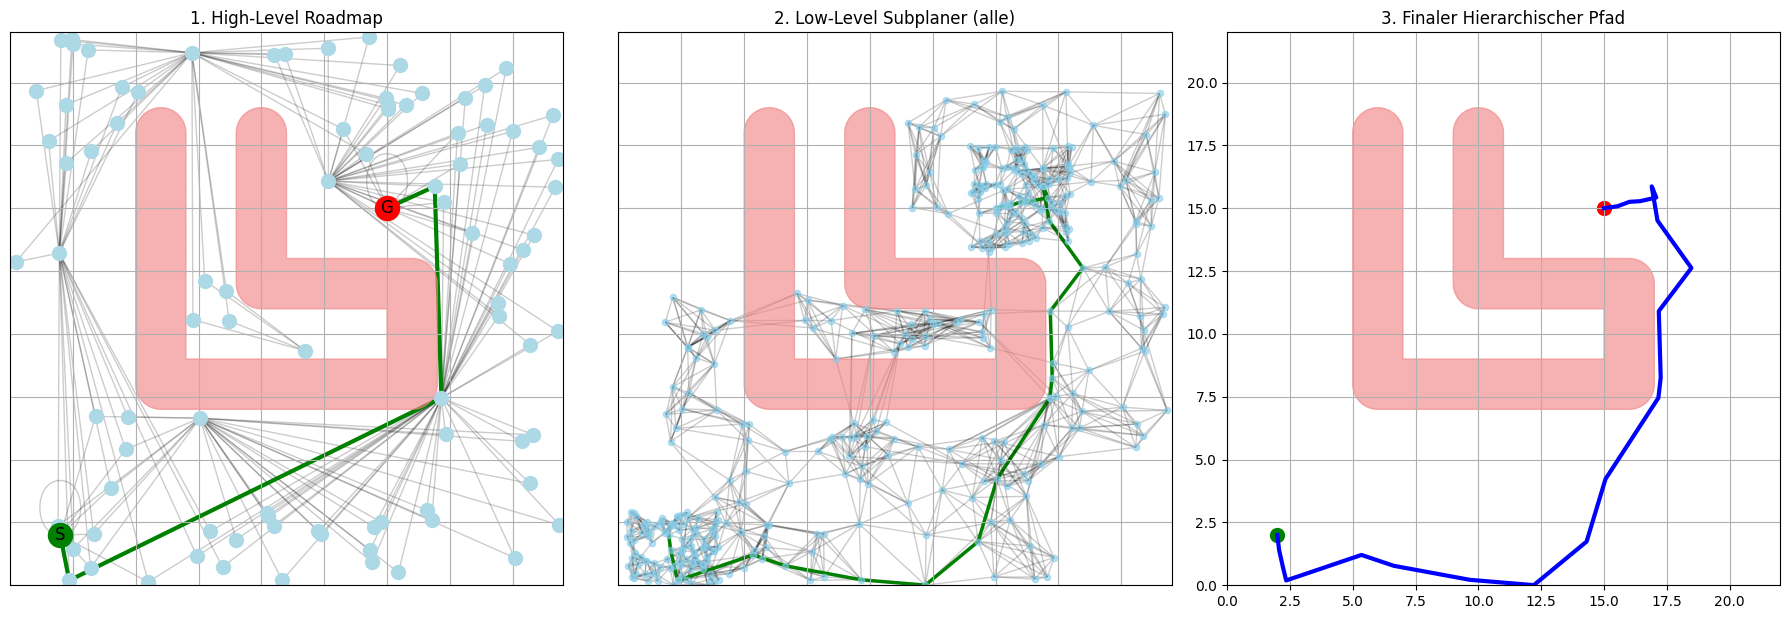


🔄 Verarbeite Szene: Cross-Shape
Globaler Pfad: ['start', 23, 2, 86, 'goal']
Koordinaten des globalen Pfads: [[10, 10.0], array([15.81232345,  4.79582643]), array([17.99170389,  9.68117586]), array([16.94651744, 20.95684244]), [12.5, 15.0]]
Segment 0: [10, 10.0] → [15.81232345  4.79582643]
→ Lokaler Planner für Segment 0: [10, 10.0] → [15.81232345  4.79582643]
   Lokale Begrenzung (geclipped): ((np.float64(5.104461499337701), np.float64(20.707861949334998)), (0, np.float64(15.199613440860125)))
Segment 1: [15.81232345  4.79582643] → [17.99170389  9.68117586]
→ Lokaler Planner für Segment 1: [15.81232345  4.79582643] → [17.99170389  9.68117586]
   Lokale Begrenzung (geclipped): ((np.float64(11.55258957304153), 22), (np.float64(1.8890770507074768), np.float64(12.587925242764037)))
Segment 2: [17.99170389  9.68117586] → [16.94651744 20.95684244]
→ Lokaler Planner für Segment 2: [17.99170389  9.68117586] → [16.94651744 20.95684244]
   Lokale Begrenzung (geclipped): ((np.float64(9.469110664

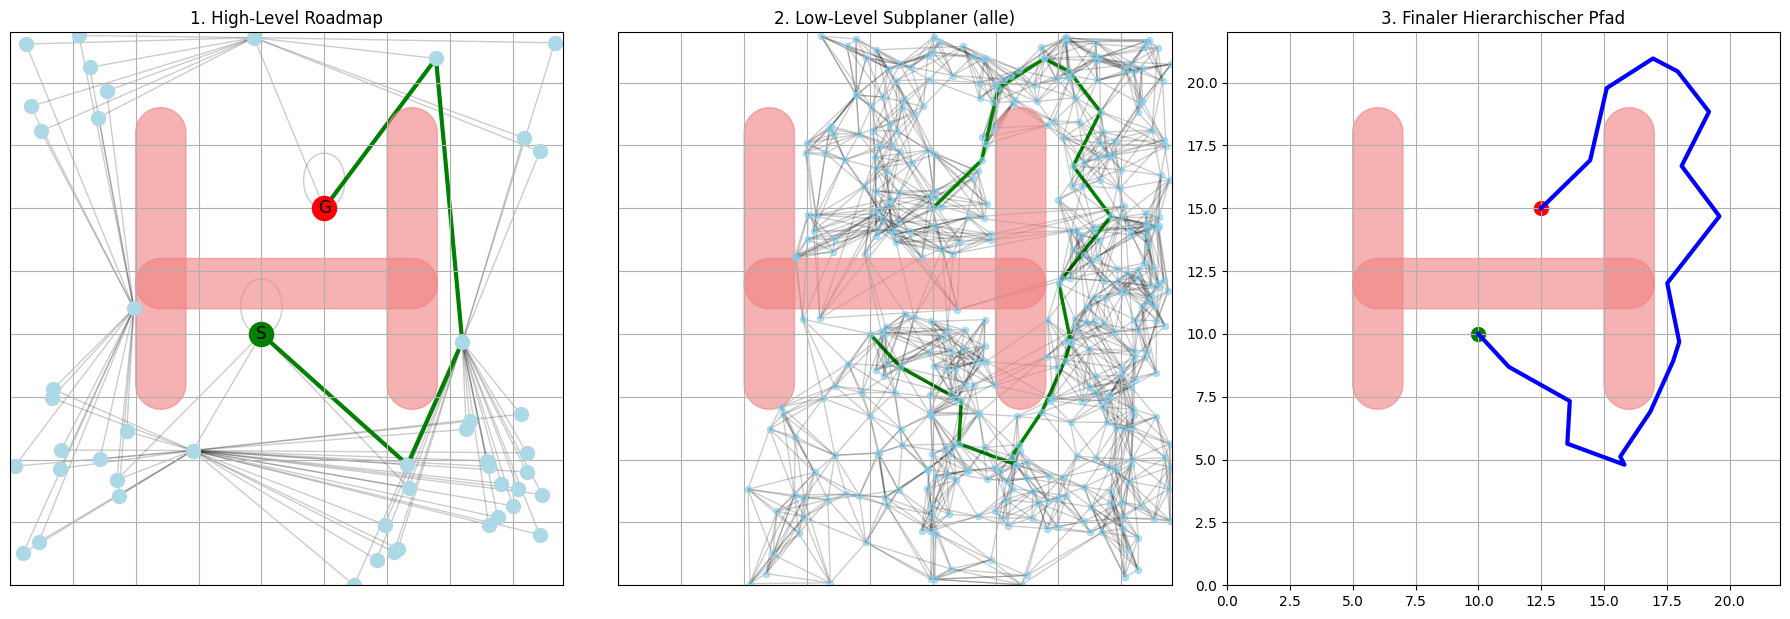


🔄 Verarbeite Szene: Corridor
Kein Pfad im Sichtbarkeitsgraph gefunden.
❌ Kein Pfad gefunden in Szene: Corridor

🔄 Verarbeite Szene: Complex Shape
Globaler Pfad: ['start', 2, 4, 0, 22, 9, 136, 'goal']
Koordinaten des globalen Pfads: [[5.0, 5.0], array([4.75325771, 9.75030368]), array([ 3.5621258 , 19.84381169]), array([ 2.41552047, 19.20634821]), array([13.88743473, 21.61294678]), array([16.53683137, 15.75098607]), array([17.74962849,  4.59306645]), [17.5, 5.0]]
Segment 0: [5.0, 5.0] → [4.75325771 9.75030368]
→ Lokaler Planner für Segment 0: [5.0, 5.0] → [4.75325771 9.75030368]
   Lokale Begrenzung (geclipped): ((np.float64(0.11992129813961405), np.float64(9.633336416001752)), (np.float64(2.6184442807184105), np.float64(12.131859398580549)))
Segment 1: [4.75325771 9.75030368] → [ 3.5621258  19.84381169]
→ Lokaler Planner für Segment 1: [4.75325771 9.75030368] → [ 3.5621258  19.84381169]
   Lokale Begrenzung (geclipped): ((0, np.float64(12.157691754662782)), (np.float64(6.79705768529511

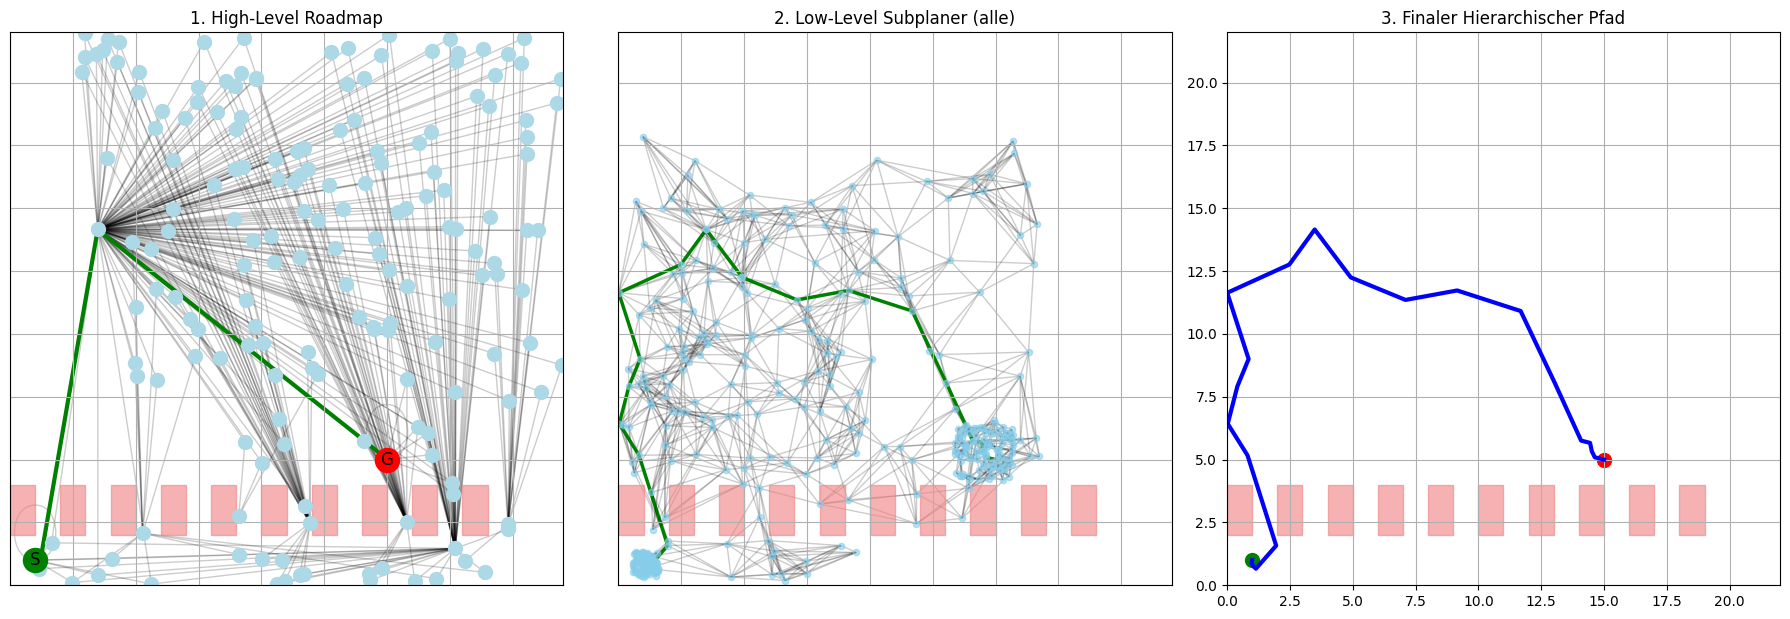


🔄 Verarbeite Szene: Random Obstacles
Globaler Pfad: ['start', 192, 0, 3, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([1.12946439, 2.66263593]), array([ 2.06261386, 10.34587289]), array([19.11852394, 18.35715195]), [19.0, 19.0]]
Segment 0: [1.0, 1.0] → [1.12946439 2.66263593]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [1.12946439 2.66263593]
   Lokale Begrenzung (geclipped): ((0, np.float64(2.732401003203413)), (np.float64(0.16364915486999654), np.float64(3.49898677318036)))
Segment 1: [1.12946439 2.66263593] → [ 2.06261386 10.34587289]
→ Lokaler Planner für Segment 1: [1.12946439 2.66263593] → [ 2.06261386 10.34587289]
   Lokale Begrenzung (geclipped): ((0, np.float64(9.33573538041179)), (0, np.float64(14.243950661927771)))
Segment 2: [ 2.06261386 10.34587289] → [19.11852394 18.35715195]
→ Lokaler Planner für Segment 2: [ 2.06261386 10.34587289] → [19.11852394 18.35715195]
   Lokale Begrenzung (geclipped): ((np.float64(2.5905689027315155), np.float64(18.5905689027315

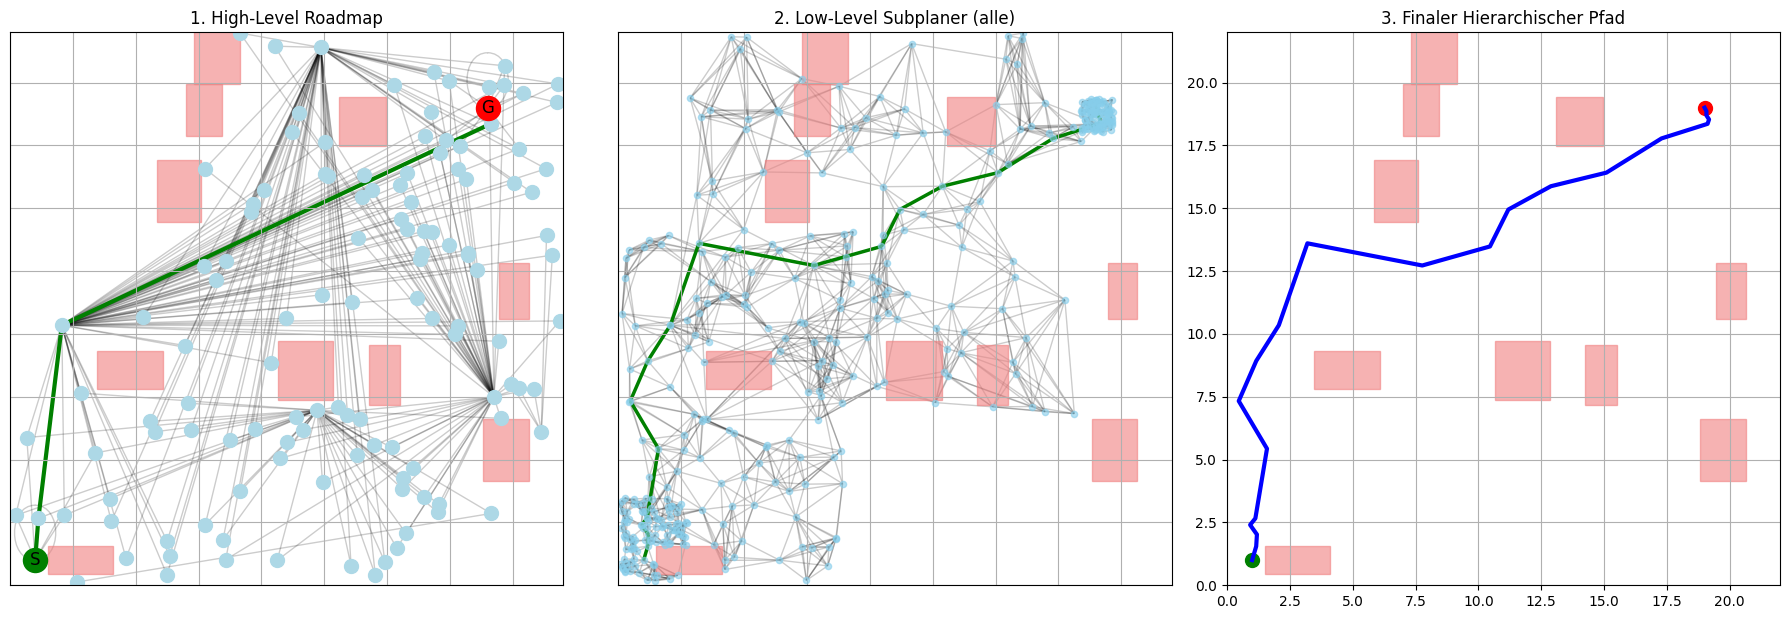

In [8]:
# --- Jede Szene durchlaufen ---
for name, (scene, limits, (start_tuple, goal_tuple)) in scenes:
    print(f"\n🔄 Verarbeite Szene: {name}")

    # Start- und Zielposition ins passende Format bringen
    start = [list(start_tuple)]
    goal = [list(goal_tuple)]

    # Kollisionserkennung
    collision_checker = CollisionChecker(scene, limits)

    # Planer initialisieren
    hier_planner = HierarchicalPlanner(
        scene=scene,
        limits=limits,
        GlobalPlannerClass=VisibilityPRM,
        LocalPlannerClass=LazyPRM,
        config_global=config_high,
        config_local=config_low
    )

    # Pfadplanung
    path = hier_planner.plan_path(start, goal)
    if not path:
        print(f"❌ Kein Pfad gefunden in Szene: {name}")
        continue
    else:
        print(f"✅ Pfad gefunden in Szene: {name}, Länge: {len(path)}")

    # Visualisierung vorbereiten (optional, kann deaktiviert werden)
    hier_planner.solution_path = path
    hier_planner.graph = hier_planner.global_planner.graph
    visualize_hierarchical_planning(hier_planner, collision_checker, config_low)

    # Alternativ: Ergebnisse speichern oder zusammenfassen